In [1]:
# project: p2
# submitter: txiong53@wisc.edu
# partner: none
# hours: 14

In [2]:
#do import
import loans
import search

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import time 


In [3]:
bank = loans.Bank("First Home Bank")

In [4]:
#q1
# what is the average interest rate for the bank?
total = 0
res = 0
count = 0
for i in range(len(bank)):
    if bank[i].interest_rate > -1:
        total += bank[i].interest_rate
        count += 1
res = total/count
res

2.962962962962963

In [5]:
#q2
# how many applicants are there per loan, on average?
total = 0
avg = 0
for i in range(len(bank)):
    total += len(bank[i].applicants)
avg = total/len(bank)
avg

1.5777777777777777

In [6]:
#q3
# what is the distribution of ages?
res = dict()
ages = list()
for i in range(len(bank)):
    if len(bank[i].applicants) > 1:
        ages.append(bank[i].applicants[0].age)
        ages.append(bank[i].applicants[1].age)
    else:
        ages.append(bank[i].applicants[0].age)

        
res["65-74"] = ages.count("65-74")
res["45-54"] = ages.count("45-54")
res["35-44"] = ages.count("35-44")
res["55-64"] = ages.count("55-64")
res[">74"] = ages.count(">74")
res["25-34"] = ages.count("25-34")
res

{'65-74': 21, '45-54': 21, '35-44': 13, '55-64': 7, '>74': 5, '25-34': 4}

In [7]:
#q4
# how many interest rate values are missing?
countlist = []
tree = search.BST()
for i in range(len(bank)):
    tree.add(bank[i].interest_rate, bank[i])
    
for i in tree[-1]:
    countlist.append(i)
    
len(countlist)

18

In [8]:
#q5
# how tall is the tree?
def maxDepth(node):
    if node is None:
        return 0
    else:
        left = maxDepth(node.left)
        right = maxDepth(node.right)
        
    return left+1 if left > right else right+1 

maxDepth(tree.root)

9

In [9]:
bank2 = loans.Bank("University of Wisconsin Credit Union")

_tree = search.BST()
for i in range(len(bank2)):
    _tree.add(bank2[i].interest_rate, bank2[i])

len(_tree[-1])

5673

Text(0, 0.5, 'Total Elapsed Milliseconds')

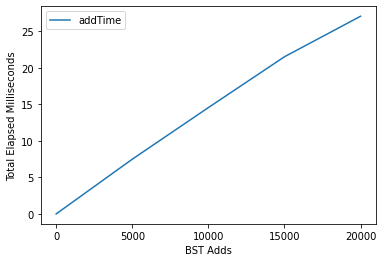

In [10]:
#q6
# how long does it take to add the loans to the tree?
tree2 = search.BST()
len(bank2)
size = [0,5000,10000,15000,20000]
timelist = list()

for i in size:
    t0 = time.time()
    for j in range(i):
        tree2.add(bank2[j].interest_rate, bank2[j])
    t1 = time.time()
    timelist.append((t1-t0)*1000)

# graph
df = DataFrame({"addTime":timelist})
ax = df.plot.line()
ax.set_xticks(range(5))
ax.set_xticklabels(["0","5000","10000","15000","20000"])
ax.set_xlabel("BST Adds")
ax.set_ylabel("Total Elapsed Milliseconds")

Text(0, 0.5, 'Milliseconds')

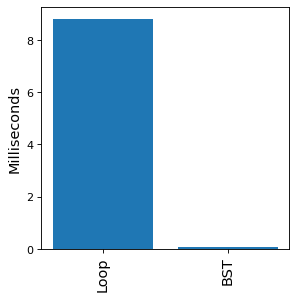

In [11]:
#q7
#how fast are tree lookups?

count = 0
arr = ["Loop", "BST"]
arr2 = list()

#time to find missing interest_rate values (-1) by looping over every loan and keeping a counter
t0 = time.time()
for i in range(len(bank2)):    
    if bank2[i].interest_rate == -1:
        count+=1
t1 = time.time()
res1 = (t1-t0)*1000
arr2.append(res1)
#time to compute len(NAME_OF_YOUR_BST_OBJECT[-1]) 
_t0 = time.time()
len(_tree[-1])
_t1 = time.time()
res2 = (_t1-_t0)*1000
arr2.append(res2)

#graph part
plt.figure(figsize=(4, 4), dpi=80)
plt.bar(arr,arr2)
plt.xticks(rotation=90,fontsize=13)
plt.ylabel("Milliseconds", fontsize=13)

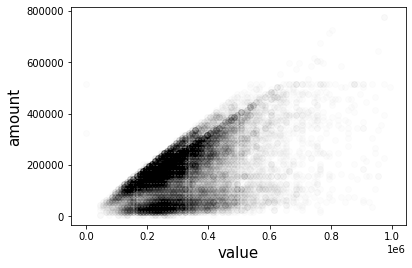

In [12]:
#q8
#what is the relationship between property value and loan amount?
pro_value = list()
loan_amount = list()
for i in range(len(bank2)):
    if bank2[i].property_value <= 1000000 and bank2[i].interest_rate > 0:
        pro_value.append(bank2[i].property_value)
        loan_amount.append(bank2[i].loan_amount)

# graph
plt.xlabel("value",fontsize=15)
plt.ylabel("amount",fontsize=15)
plt.yticks(np.arange(0,1000000,200000))
plt.scatter(pro_value, loan_amount, alpha=0.01, color = "#000000")


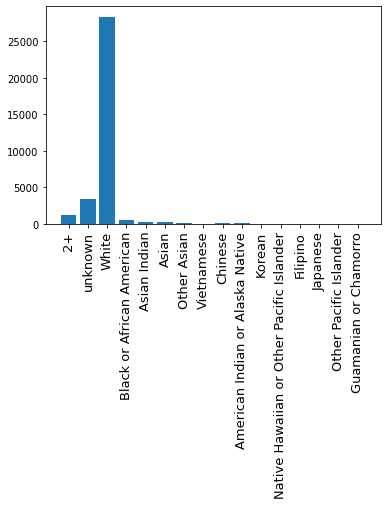

In [13]:
#q9
# what is the distribution of race for UWCU loan applicants?
raceDict = {}
raceDict['2+'] = 0
raceDict['unknown'] = 0
for loan in bank2.LoanObj:
    for app in loan.applicants:        
        if len(app.race) == 0:
            raceDict['unknown'] = raceDict['unknown'] + 1
        if len(app.race) >= 2:
            raceDict['2+'] = raceDict['2+'] + 1
        else:
            for race in app.race:
                raceDict[race] = raceDict[race] + 1 if race in raceDict.keys() else 0
plt.bar(raceDict.keys(), raceDict.values())
plt.xticks(rotation=90,fontsize=13)
plt.show()              

In [14]:
#q10
def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

count_nodes(_tree.root)

32